Robin Zhao <br>
Oviya Adhan <br>
Clarissa Solis

# Tweet (Corpus) preparation

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.stats import pearsonr

In [4]:
#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
all = pd.read_csv("/content/drive/MyDrive/ATDS Final Project/total_tweets.csv")
all

,date,text,sentiment,retweet_count,country,city
0,2020-3-21,"['This', 'is', 'how', 'you', 'get', 'over', 'C...",0.491146,0,United States,"Roanoke, TX"
1,2020-3-21,"['Wake', 'me', 'up', 'when', 'Corona', 'ends',...",0.625000,0,India,"Pithoragarh, India"
2,2020-3-21,"['My', 'open', 'letter', 'to', 'the', 'CEO', '...",0.000000,0,India,"New Delhi, India"
3,2020-3-21,"['Covid', '19', 'protective', 'measures', 'fro...",0.500000,0,India,"New Delhi, India"
4,2020-3-21,"['Dear', 'Travels', 'If', 'you', 'got', 'stuck...",0.102344,1,Sri Lanka,Sri Lanka
...,...,...,...,...,...,...
350580,2021-7-20,"['1', 'of', '2', 'Settled', 'COVID19', 'CovidS...",0.136364,0,Singapore,"North Region, Singapore"
350581,2021-7-20,"['Visiting', 'someone', 'in', 'the', 'hospital...",0.000000,0,United States,"San Luis Obispo, CA"
350582,2021-7-20,"['First', 'World', 'COVID', 'Problems', 'Lovel...",0.000000,0,Australia,"Crafers - Bridgewater, South Australia"
350583,2021-7-20,"['That', 'be', 'majority', 'of', 'my', 'genera...",0.266667,0,United States,"Kansas, USA"


In [6]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350585 entries, 0 to 350584
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           350585 non-null  object 
 1   text           350585 non-null  object 
 2   sentiment      350585 non-null  float64
 3   retweet_count  350585 non-null  int64  
 4   country        349271 non-null  object 
 5   city           349737 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 16.0+ MB


In [7]:
all['date']=pd.to_datetime(all['date'])

In [8]:
# Extract only New York City (New York, NY) tweets --> New York, Manhattan, Brooklyn, Queens, Bronx, Staten Island
#nyc = all.loc[all['city'].isin(['New York, NY', 'Manhattan, NY', 'Brooklyn, NY', 'Queens, NY', 'Bronx, NY', 'Staten Island, NY'])]
#nyc

#For New York STATE --> if using this, CHANGE nyc dataframe to ny below

all = all.dropna()
ny = all[all['city'].str.contains(' NY')]
ny

,date,text,sentiment,retweet_count,country,city
37,2020-03-21,"['Even', 'Dr', 'Fauci', 'cant', 'take', 'his',...",-0.204545,0,United States,"Manhattan, NY"
39,2020-03-21,"['covid19', 'duxduce', 'corona', 'beer', 'vs',...",0.136364,0,United States,"Queens, NY"
219,2020-03-21,"['We', 'are', 'continuing', 'to', 'monitor', '...",0.327273,0,United States,"Manhattan, NY"
238,2020-03-21,"['Corona', 'NY', 'Sat', 'Mar', '21st', 'AM', '...",0.425000,0,United States,"Queens, NY"
262,2020-03-21,"['Oreo', '“you’re', 'gonna', 'be', 'here', 'al...",0.000000,0,United States,"Queens, NY"
...,...,...,...,...,...,...
350376,2021-07-20,"['Just', 'posted', 'a', 'video', 'Flushing', '...",0.000000,0,United States,"Queens, NY"
350472,2021-07-20,"['Safe', 'entertaining', 'tips', 'for', 'grand...",0.000000,0,United States,"Manhattan, NY"
350521,2021-07-20,"['Summer', 'haircut', 'Wearing', 'a', 'mask', ...",0.100000,0,United States,"Brooklyn, NY"
350575,2021-07-20,"['The', 'fact', 'that', 'I', 'was', 'able', 't...",0.070833,0,United States,"Manhattan, NY"


# Zipf's Law

In [17]:
# importing stopword packages
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
from nltk.tokenize import RegexpTokenizer
import re 
import string
from nltk.stem import WordNetLemmatizer
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()
tweets = list(ny['text'].str.lower())
for i in range(len(tweets)):
  temp=word_tokenize(tweets[i])
  temp_after_punc=[]
  for j in temp:
    if j not in string.punctuation and j!="``":
      temp_after_punc.append(wordnet_lemmatizer.lemmatize(j[1:]))
  tweets[i]=temp_after_punc
tweets[0]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['even',
 'dr',
 'fauci',
 'cant',
 'take',
 'his',
 'b',
 'no',
 'more',
 '😂😂😂😂😂',
 'corona',
 'wtf',
 'hedone',
 'time',
 'square',
 'new',
 'york',
 'city',
 'httpstco2xtoi1rgze']

In [19]:
total_tweet=[]
for i in tweets:
  total_tweet+=i
counter=Counter(total_tweet)
tweet_key=list(map(lambda x: x[0], counter.most_common()[:300]))
tweet_count=list(map(lambda x: x[1], counter.most_common()[:300]))

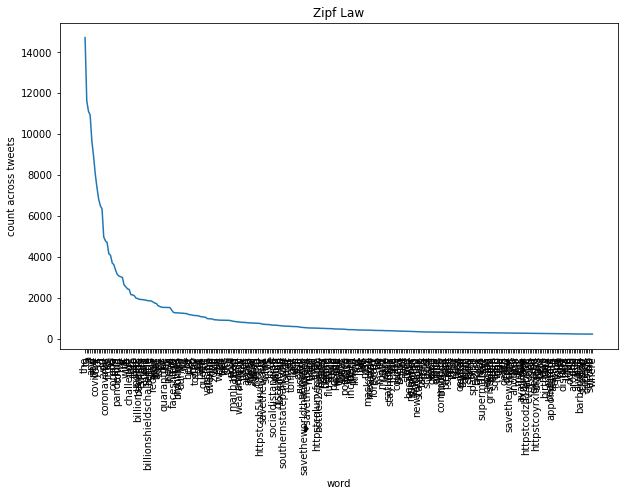

In [20]:
plt.figure(figsize=(10,6))
plt.xticks(rotation = 90)
plt.ylabel("count across tweets")
plt.xlabel('word')
plt.title('Zipf Law')
plt.plot(tweet_key, tweet_count)

# NLP (Preprocessing)

## Tweet dataset

In [21]:
# lower case, remove punctuation, stop word, lemmanization
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()
tweets = list(ny['text'].str.lower())
stopwords = stopwords.words('english')
for i in range(len(tweets)):
  temp=word_tokenize(tweets[i])
  temp_after_punc=[]
  for j in temp:
    if j not in string.punctuation and j!="``" and j not in stopwords:
      temp_after_punc.append(wordnet_lemmatizer.lemmatize(j[1:]))
  tweets[i]=temp_after_punc
tweets[0]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['even',
 'dr',
 'fauci',
 'cant',
 'take',
 'his',
 'b',
 'no',
 'more',
 '😂😂😂😂😂',
 'corona',
 'wtf',
 'hedone',
 'time',
 'square',
 'new',
 'york',
 'city',
 'httpstco2xtoi1rgze']

In [22]:
df=ny.copy()
df['text']=tweets
df

,date,text,sentiment,retweet_count,country,city
37,2020-03-21,"[even, dr, fauci, cant, take, his, b, no, more...",-0.204545,0,United States,"Manhattan, NY"
39,2020-03-21,"[covid19, duxduce, corona, beer, v, virus, que...",0.136364,0,United States,"Queens, NY"
219,2020-03-21,"[we, are, continuing, to, monitor, the, covid1...",0.327273,0,United States,"Manhattan, NY"
238,2020-03-21,"[corona, ny, sat, mar, 21st, am, forecast, tod...",0.425000,0,United States,"Queens, NY"
262,2020-03-21,"[oreo, , , on, a, be, here, all, day, aren, , ...",0.000000,0,United States,"Queens, NY"
...,...,...,...,...,...,...
350376,2021-07-20,"[just, posted, a, video, flushing, meadow, cor...",0.000000,0,United States,"Queens, NY"
350472,2021-07-20,"[safe, entertaining, tip, for, grandparent, in...",0.000000,0,United States,"Manhattan, NY"
350521,2021-07-20,"[summer, haircut, wearing, a, mask, for, my, o...",0.100000,0,United States,"Brooklyn, NY"
350575,2021-07-20,"[the, fact, that, i, wa, able, to, fly, back, ...",0.070833,0,United States,"Manhattan, NY"


## COVID dataset

findfont: Font family ['sans_serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans_serif'] not found. Falling back to DejaVu Sans.


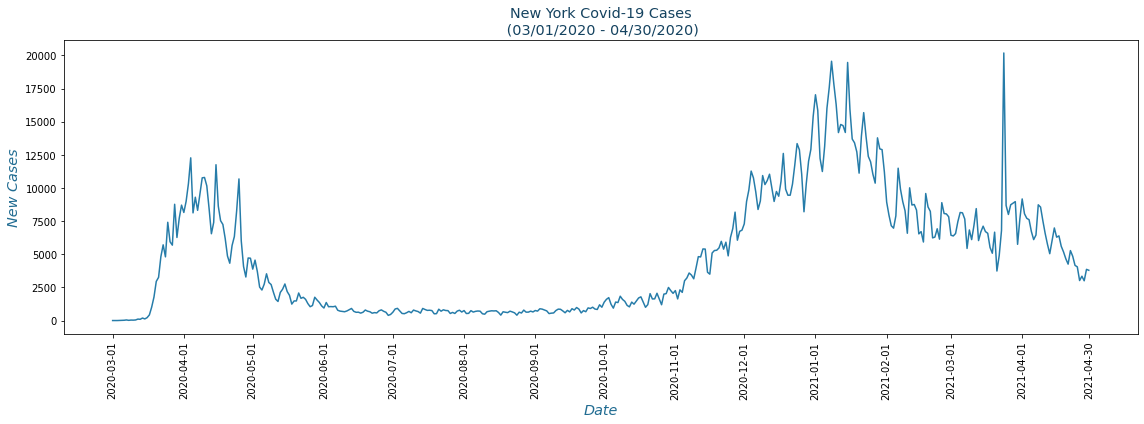

In [23]:
#All state, covid data
states = pd.read_csv("/content/drive/MyDrive/ATDS Final Project/States.csv")

#Limit to New York
ny_covid = states.loc[states['state'] == 'New York']

#Limit to 3/2020 - 4/2021 (to match tweet data)
ny_covid = ny_covid[(ny_covid['date'] > '2020-02-28') & (ny_covid['date'] < '2021-05-01')]
ny_covid

#Create column to count new cases rather than aggregated cases
ny_covid['new_cases'] = ny_covid['cases'].diff()
ny_covid.at[246, 'new_cases'] = 1.0
ny_covid['new_cases'] = ny_covid['new_cases'].astype(int)
ny_covid

dates = ny_covid['date'].tolist()
first_day_month = []
for i in dates:
  if i[-2:] == '01':
    first_day_month.append(i)

first_day_month.append('2021-04-30')
first_day_month


fig, ax = plt.subplots()
ax.plot(ny_covid['date'], ny_covid['new_cases'], color = '#267CA9')
ax.tick_params(axis='x',rotation=90)
ax.set_xticks(first_day_month)
ax.set_xlabel('Date', weight = 'book', fontfamily = 'sans_serif', fontsize = 'x-large', color = '#216C92', fontstyle = 'oblique')
ax.set_ylabel('New Cases', weight = 'book', fontfamily = 'sans_serif', fontsize = 'x-large', color = '#216C92', fontstyle = 'oblique')
ax.set_title('New York Covid-19 Cases\n (03/01/2020 - 04/30/2020)', weight = 'book', fontfamily = 'sans_serif', fontsize = 'x-large', color = '#154360')
fig.set_size_inches(16, 6)
fig.tight_layout();

# NLP Analysis

In [24]:
mental_health_words = ['mental', 'anxiety', 'depression', 'worried', 'anxious', 'scared', 'depressed', 
                       'lonely','heartbroken','gloomy','disappointed','hopeless','grieved','unhappy','lost',
                       'troubled','resigned','miserable','doubtful','nervous','anxious','terrified','panicked',
                       'horrified','desperate','confused','stressed','afraid','agitation','agony','aggressive',
                       'alarm','alienation','anger','anguish','annoyed','anxious','apathy','apprehension',
                       'aversion','baffled','bewildered','bitter','bored','brooding','claustrophobic','coercive',
                       'confusion','contempt','cowardly','cruel','dazed','dejected','demoralized','depressed','despair',
                       'disappointment','discombobulated','discomfort','discontentment','disgruntled','disgust','disheartened',
                       '​dislike','dismay','disoriented','dispirited','displeasure','distress','disturbed','doubtful','dread',
                       'dumbstruck','embarrassment','ennui','envy','exasperated','fear','fright','frustrated','fury','gloomy','glumness',
                       'greed','grief','grouchiness','grumpiness','guilt','hate','helpless','homesickness','hopeless','horrified','humiliation',
                       'hurt','hysteria','impatient','indignant','infuriated','insecurity','insulted','irritated','isolated','jealousy','lazy',
                       '​loathing','lonely','longing','loopy','mad','melancholy','miserable','miserliness','mixed up','moody','mortified','nasty',
                       'nauseated','negative','neglected','nervous','numb','obstinate','offended','outrage','overwhelmed','panicked','paranoid',
                       'perplexed','pessimism','pity','possessive','powerless','puzzled','rage​','rattled','regret','rejected','reluctant',
                       'remorseful','resentment','resignation','restlessness','revulsion','ruthless','sadness','scared','scorn','self-conscious',
                       'self-critical','self-doubtful','self-loathing','self-pity','shame','shocked','smug','​sorrow','spite','stressed','stubborn',
                       'stuck','submissive','suffering','sullen','suspicious','tension','terror','tired','​torment','troubled','uncertainty','undermined',
                       'uneasiness','unhappy','unnerved','unsettled','unsure','upset','vengeful','vicious','vigilant','vulnerable','weak',
                       'woe','worried','wrath']
len(set(mental_health_words))

170

In [25]:
tweetPlot=[]
for i in tweets:
  tweetPlot+=i

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


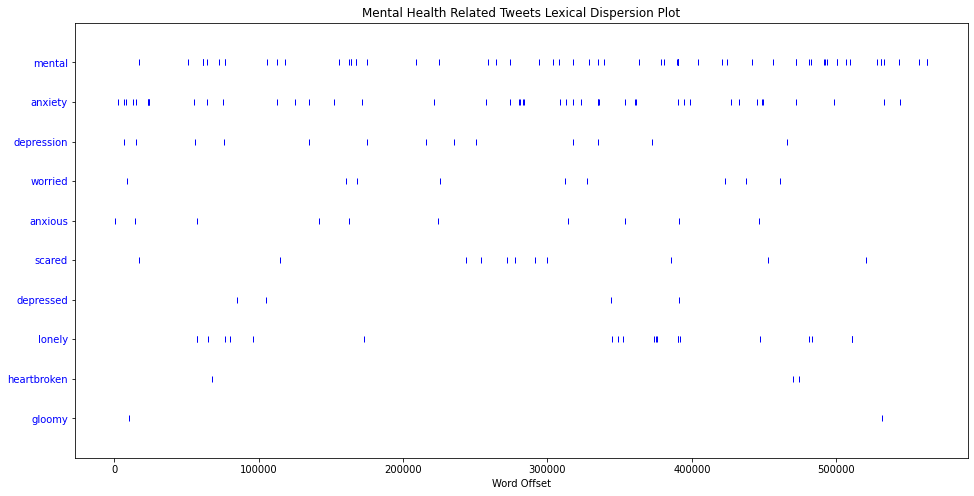

In [26]:
import matplotlib.pyplot as plt
from nltk.draw.dispersion import dispersion_plot
nltk.download('gutenberg')

fig, ax = plt.subplots(figsize=(16,8))
dispersion_plot(tweetPlot, mental_health_words[:10], ignore_case = True, title='Mental Health Related Tweets Lexical Dispersion Plot')

# Compare to Total covid cases

In [27]:
# Extract only mental health related tweets (iterate through every row 'text' and if word = 'mental' in list, add that row to df, and move to next column)

#Intialize empty dataframe
df = pd.DataFrame(columns = ['date', 'text', 'sentiment', 'retweet_count', 'country', 'city'])

#Iterate through text column in nyc dataframe, collect indices of entries that include keywords
mh_indices = []
for column, row in ny['text'].iteritems(): #column = index, row = text
  for j in mental_health_words:
    if j in row:
      mh_indices.append(column)

#Add mental health related entries to new dataframe 
for i in mh_indices:
  entry = ny.loc[i]
  df = df.append([entry])

df

,date,text,sentiment,retweet_count,country,city
331,2020-03-21,"['Still', 'increasing', 'number', 'of', 'coron...",0.5000,0,United States,"Manhattan, NY"
446,2020-03-21,"['My', 'attempt', 'at', 'curbing', 'carbs', 'd...",0.0000,0,United States,"Manhattan, NY"
603,2020-03-21,"['😷', 'Day', '6', 'of', 'being', 'Quarantined'...",0.0000,1,United States,"Poughkeepsie, NY"
760,2020-03-21,"['Corona', 'virus', 'day', 'whatever', 'gettin...",0.1300,0,United States,"Huntington Station, NY"
760,2020-03-21,"['Corona', 'virus', 'day', 'whatever', 'gettin...",0.1300,0,United States,"Huntington Station, NY"
...,...,...,...,...,...,...
346866,2021-07-08,"['New', 'York', 'City\u2063\u2063\u2063', '\u2...",-0.0625,0,United States,"Manhattan, NY"
346970,2021-07-08,"['\u2063', 'New', 'York', 'City\u2063\u2063\u2...",0.2000,0,United States,"Manhattan, NY"
347306,2021-07-09,"['Something', 'about', 'leaving', 'on', 'a', '...",0.0000,0,United States,"Manhattan, NY"
348016,2021-07-12,"['Fight', 'the', '🦠', 'stopssianhate', 'newyor...",0.2500,0,United States,"Manhattan, NY"


In [28]:
df.index=df['date']
agg_df=df.groupby(pd.Grouper(freq='M')).count()
agg_df['sentiment']=df.groupby(pd.Grouper(freq='M')).mean()['sentiment']
agg_df['date']=agg_df.index
agg_df

,date,text,sentiment,retweet_count,country,city
date,,,,,,
2020-03-31,2020-03-31,46,0.139896,46,46,46
2020-04-30,2020-04-30,111,0.083998,111,111,111
2020-05-31,2020-05-31,260,0.115865,260,260,260
2020-06-30,2020-06-30,215,0.130743,215,215,215
2020-07-31,2020-07-31,263,0.167554,263,263,263
2020-08-31,2020-08-31,302,0.132451,302,302,302
2020-09-30,2020-09-30,174,0.118592,174,174,174
2020-10-31,2020-10-31,96,0.133593,96,96,96
2020-11-30,2020-11-30,87,0.120125,87,87,87


In [34]:
ny_covid['date']=pd.to_datetime(ny_covid['date'])
ny_covid.index=ny_covid['date']
agg_covid=ny_covid.groupby(pd.Grouper(freq='M')).sum()
agg_df['new_cases']=(agg_covid['new_cases']-agg_covid['new_cases'].mean())/agg_covid['new_cases'].std()
agg_df['sentiment']=(agg_df['sentiment']-agg_df['sentiment'].mean())/agg_df['sentiment'].std()
agg_df['keyword']=(agg_df['text']-agg_df['text'].mean())/agg_df['text'].std()

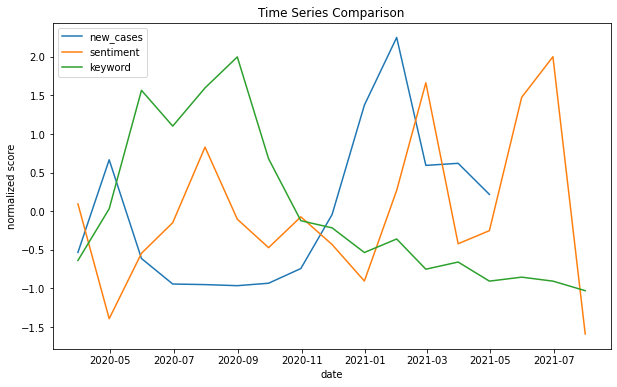

In [36]:
plt.figure(figsize=(10,6))
plt.plot('date', 'new_cases', data=agg_df) #new cases
plt.plot('date', 'sentiment', data=agg_df) #sentiment of tweets
plt.plot('date', 'keyword', data=agg_df) #occurence of keywords
plt.xlabel('date')
plt.ylabel('normalized score')
plt.title('Time Series Comparison')
plt.legend()

In [38]:
agg_df['shifted']=agg_df['keyword'].shift(1)
agg_df.corr()['shifted']['sentiment']

-0.07891761814633674

In [37]:
agg_df['shifted']=agg_df['keyword'].shift(1)
agg_df.corr()['shifted']['new_cases']

-0.7738515705121191

In [32]:
pearsonr(agg_df['new_cases'][:-3], agg_df['text'].shift(-2)[:-3])

(-0.48800207847864707, 0.07667468280336753)

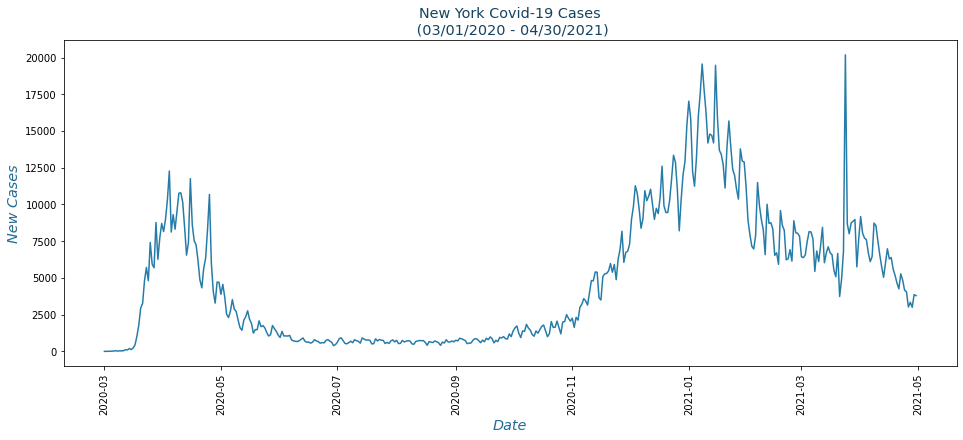

In [33]:
fig, ax = plt.subplots()
ax.plot(ny_covid['date'], ny_covid['new_cases'], color = '#267CA9')
ax.tick_params(axis='x',rotation=90)
ax.set_xlabel('Date', weight = 'book', fontfamily = 'sans_serif', fontsize = 'x-large', color = '#216C92', fontstyle = 'oblique')
ax.set_ylabel('New Cases', weight = 'book', fontfamily = 'sans_serif', fontsize = 'x-large', color = '#216C92', fontstyle = 'oblique')
ax.set_title('New York Covid-19 Cases\n (03/01/2020 - 04/30/2021)', weight = 'book', fontfamily = 'sans_serif', fontsize = 'x-large', color = '#154360')
fig.set_size_inches(16, 6)
fig.show()